# Markov Decision Process

MDP are processes where the current state depends only on the previous state and action instead of the total history of actions taken previously.

(S1,A1,R1,S2,A2,R2,....)

**Markov Property**

```
The future is independent of the past given the present.
```

=> In mathematical terms, a state St has the Markov property, if and only if;

```
P[St+1 | St] = P[St+1 | S1, ….. , St],
```

the state captures all relevant information from history.

=> For a Markov state S and successor state S′, the state transition probability function is defined by,

```
Pss' = P[St+1 = s' | St = s]
```

Total discounted rewards from time step t => Gt

The goal is to maximize Gt.

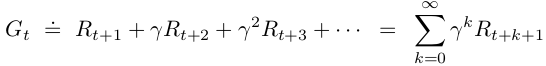

𝛾 is a discount factor, where 𝛾 ∈ [0, 1]. It informs the agent of how much it should care about rewards now to rewards in the future. If (𝛾 = 0), that means the agent is short-sighted, in other words, it only cares about the first reward. If (𝛾 = 1), that means the agent is far-sighted, i.e. it cares about all future rewards.

What we care about is the total rewards that we’re going to get.

Usually the value of 𝛾 is chosen between 0.95 and 0.99.

A reason to discount rewards is that, the agent is not certain about what would happen in the future, it might be better to take the immediate reward rather than waiting in the hope to get a larger reward in the future, so 𝛾 defines a kind of finite horizon for what to care about. 𝛾 implicitly encoded the animal/human cognitive model, which shows preferences for immediate rewards.

In [1]:
# Import Dependencies
import gym
import numpy as np
import matplotlib.pyplot as plt

The Environment looks like the following:

```
SFFF
FHFH
FFFH
HFFG
```

**Action Space:**

```
LEFT: 0
DOWN: 1
RIGHT: 2
UP: 3
```

The agent can use the following policies:

**Policy-1:**

```
[Episode]
States: S -> F -> F -> F -> F -> F -> G

Actions: -> Down -> Down -> Right -> Down -> Right -> Right
```

**Policy-2:**

```
[Episode]
States: S -> F -> F -> F -> F -> F -> G

Actions: -> Right -> Right -> Down -> Down -> Down -> Right
```

and so on....

To write the policy in code, we'll use a dictionary where the keys represent the states and the values represent the actions the agent takes.

Since, the holes "H" are the point where the game gets terminated, there is no action space for that.

In [2]:
# Define a Deterministic Policy
# policy = dict(keys, values) => keys: states, values: actions
#         S.    F.    F     F
policy = {0: 1, 1: 2, 2: 1, 3: 0,
        # F     F
          4: 1, 6: 1,
        # F.    F.    F
          8: 2, 9: 1, 10: 1,
        # F.     F
          13: 2, 14: 2}

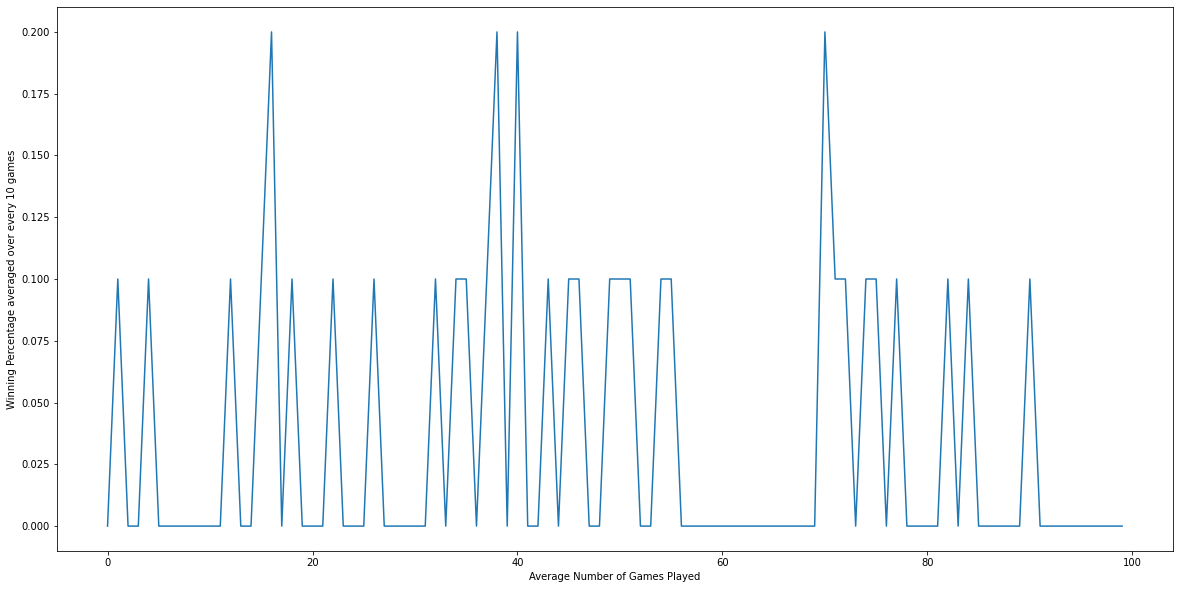

In [3]:
# Instantiate the Environment
env = gym.make('FrozenLake-v0')

# Number of Games to Play
num_games = 1000

# Win Percentage
win_percent = []

# Scores
scores = []

# Run the Environment for 1000 Games
for i in range(num_games):
    # Done flag depicting end of game
    done = False
    # Initial Score
    score = 0
    # Reset the Environment
    obs = env.reset()
    # Play the Episode
    while not done:
        # Agent Takes an action based upon the Policy and the current Observation 
        # of the environment state
        action = policy[obs]
        # New observation, reward, done status and info
        obs, reward, done, info = env.step(action)
        score += reward
    
    # Append final score to Scores
    scores.append(score)
    
    # Keep track of average win percentage for every last 10 games
    if i%10 == 0:
        average = np.mean(scores[-10:])
        win_percent.append(average)

# Close the Environment once done
env.close()

# Plot Wins Percentage
plt.figure(figsize=(20,10))
plt.plot(win_percent)
plt.xlabel('Average Number of Games Played')
plt.ylabel('Winning Percentage averaged over every 10 games');

So, we see that using a simple policy, we are able to reach upto 20% win percentage which is a bit better than the random actions that the agent was taking before.

## Summary

1. Markov Decision Processes are processes that are solely determined by previous states and actions taken.

2. They are goverened by the probability distributions that govern how the envioronment works.

3. Agent's goal is to maximize the reward over time.

4. We know about the expected future rewards as we know what actions the agent can take as they are defined by the policy.